In [2]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv("train_E6oV3lV.csv")
test=pd.read_csv("test_tweets_anuFYb8.csv")

Text is a highly unstructured form of data various types of noise is present in it.

In [4]:
train[train['label'] == 0].head(10)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

In [5]:
train[train['label'] == 1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

* There are quite many words and characters which are not really required . So we will try to keep the only the words which add value.
* Cleaning raw text is an important step.It helps in getting rid of unwanted words and characters which helps in ontaining better features.
* The entire process of making standardized text and making the text noise free is called text preprocessing.

In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

<b>The objective of step is to clean noise those are less relevant to find sentiment of tweets such as punctuation, special characters, numbers which do not carry weightage in context of text.</b>
* Before this let us combine train and test sets.Combining the datasets will make it convinent for us to preprocess data.

In [7]:
combi=train.append(test,ignore_index=True)

C:\Users\SUSHMA\AppData\Local\Temp\ipykernel_14604\2138372785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi=train.append(test,ignore_index=True)


In [8]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt    

We will be following the few steps to clean raw data:

1. We will remove the twitter handles as they are marked as <b>@user.</b>This twitter handles hardly give any information about tweet nature.
2. We will also get rid of <b>punctuations, special characters, numbers</b> since they would not help in differentiating the tweets.
3. Most of smaller words do not add much value.So we will try to remove them.
4. Lastly we will try to <b>normalize data</b> by reducing the words to root word which helps in reducing number of unique words.

In [9]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [10]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("^[a-zA-Z#]"," ")
combi.head()

C:\Users\SUSHMA\AppData\Local\Temp\ipykernel_14604\1269446297.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet']=combi['tidy_tweet'].str.replace("^[a-zA-Z#]"," ")


id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3   model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

* Here I have decided to remove words of <b>length less or equal to 3</b> such as "hmm","oh" which are very less useful.

In [11]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if(len(w) > 3)]))
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit can't cause they don't off...  
2                                bihday your majesty  
3  model love take with time urð±!!! ððð...  
4                    factsguide: society #motivation

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce

tokenize_words=combi['tidy_tweet'].apply(lambda x : x.split())
tokenize_words

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, can't, cause, they, do...
2                                  [bihday, your, majesty]
3        [model, love, take, with, time, urð±!!!, ð...
4                      [factsguide:, society, #motivation]
                               ...                        
49154    [hought, factory:, left-right, polarisation!, ...
49155    [eeling, like, mermaid, ð, #hairflip, #neve...
49156    [hillary, #campaigned, today, #ohio((omg)), &a...
49157    [appy,, work, conference:, right, mindset, lea...
49158    [song, glad", free, download!, #shoegaze, #new...
Name: tidy_tweet, Length: 49159, dtype: object

In [13]:
ps=PorterStemmer()
tokenize_words=tokenize_words.apply(lambda words: reduce(lambda x, y: x + " " + ps.stem(y), words, ""))
tokenize_words

0         when father dysfunct selfish drag kid into dy...
1         thank #lyft credit can't caus they don't offe...
2                                      bihday your majesti
3         model love take with time urð±!!! ððð...
4                               factsguide: societi #motiv
                               ...                        
49154     hought factory: left-right polarisation! #tru...
49155     eel like mermaid ð #hairflip #neverreadi #...
49156     hillari #campaign today #ohio((omg)) &amp; us...
49157     appy, work conference: right mindset lead cul...
49158     song glad" free download! #shoegaz #newmus #n...
Name: tidy_tweet, Length: 49159, dtype: object

In [14]:
combi['tidy_tweet']=tokenize_words
combi.head()

id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   

                                          tidy_tweet  
0   when father dysfunct selfish drag kid into dy...  
1   thank #lyft credit can't caus they don't offe...  
2                                bihday your majesti  
3   model love take with time urð±!!! ððð...  
4                         factsguide: societi #motiv

* Now I want to see how well the given sentiments are distributed across train dataset.One way to accomplish the task is by plotting <b>word cloud</b> where words which occurs <b>frequently appears in large size</b> and <b>less frequen words appear in small size.</b>

In [16]:
#collecting all words for plotting word clous
all_words=' '.join([text for text in combi['tidy_tweet']])
all_words

' when father dysfunct selfish drag kid into dysfunction. #run  thank #lyft credit can\'t caus they don\'t offer wheelchair van pdx. #disapoint #getthank  bihday your majesti  model love take with time urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  factsguide: societi #motiv  [2/2] huge fare talk befor they leave. chao disput when they there. #allshowandnogo  camp tomorrow dannyâ\x80¦  next school year year exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girl  won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali  welcom here it\' #gr8  #ireland consum price index (mom) climb from previou 0.2% 0.5% #blog #silver #gold #forex  selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love  daddi today!! #80day #gettingf  #cnn call #michigan middl school \'build wall\' chant #tcot  comment! #australia #opkillingbay

In [17]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


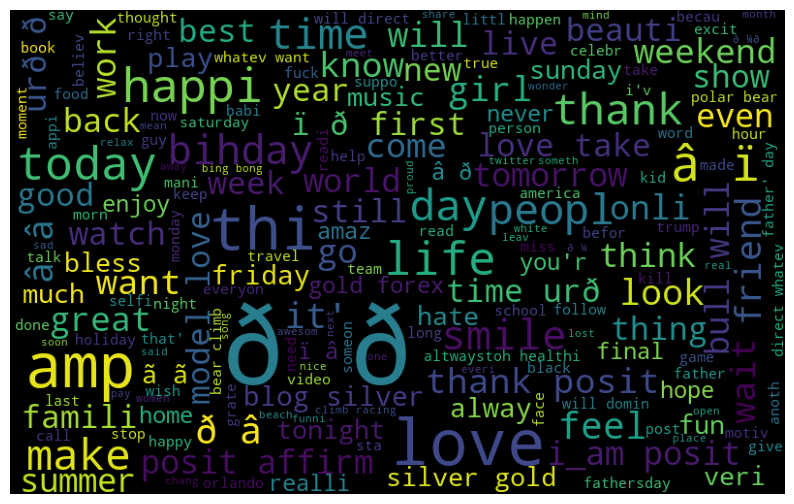

In [18]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<i><b>From the above wordcloud we can see most of tweets are positive but it doesn't give information about racist tweets so we will plot worcloud for racist and non-racist tweets seperately.</b></i>

In [19]:
normal_words=' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
normal_words

' when father dysfunct selfish drag kid into dysfunction. #run  thank #lyft credit can\'t caus they don\'t offer wheelchair van pdx. #disapoint #getthank  bihday your majesti  model love take with time urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  factsguide: societi #motiv  [2/2] huge fare talk befor they leave. chao disput when they there. #allshowandnogo  camp tomorrow dannyâ\x80¦  next school year year exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girl  won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali  welcom here it\' #gr8  #ireland consum price index (mom) climb from previou 0.2% 0.5% #blog #silver #gold #forex  selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love  daddi today!! #80day #gettingf  uch...junior angryð\x9f\x98\x90#got7 #junior #yugyoem #omg  thank have paner. #thank #posit  #

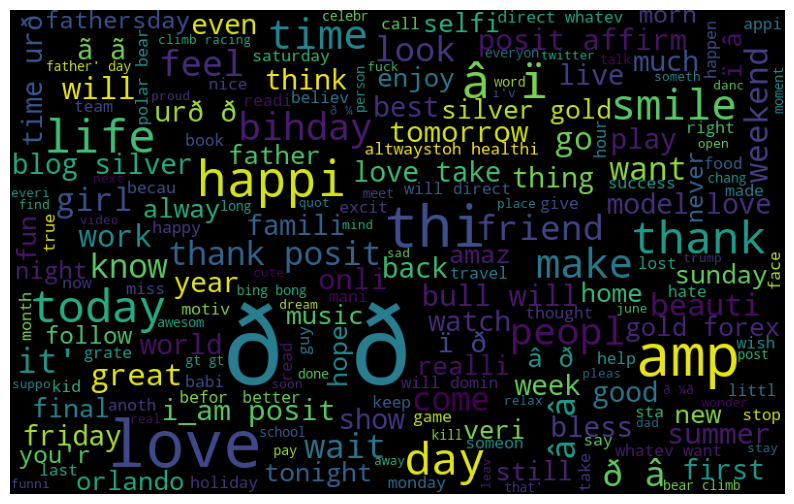

In [20]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

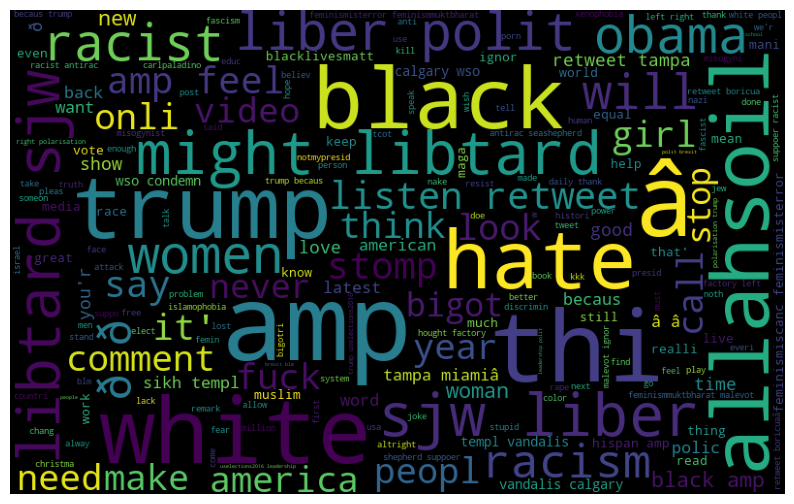

In [44]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<i><b>Hastags play major role in twitter.We will try to checck whether these add any value to distinguish between racist and non-racist tweets</b></i>

In [21]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags    

In [22]:
#extracting hastags for non-racist tweets
HT_Regular=hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])
HT_Regular=sum(HT_Regular,[])
HT_Regular

['run',
 'lyft',
 'disapoint',
 'getthank',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 '80day',
 'gettingf',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontphotoshopeveryth

In [23]:
#extracting hastags for racist tweets
HT_Negative=hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])
HT_Negative=sum(HT_Negative,[])
HT_Negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'medâ',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'â',
 'prejudic',
 'hope',
 'hate',
 'conflictâ',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'femini

In [15]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
vec=vectorizer.fit_transform(combi['tidy_tweet'])
#print("Vocabulary: ", vectorizer.vocabulary_)
#print(vec.toarray())
vec.shape

(49159, 1000)

In [16]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [17]:
tokenize_words=combi['tidy_tweet'].apply(lambda x : x.split())
tokenize_words

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, can't, caus, they, don'...
2                                  [bihday, your, majesti]
3        [model, love, take, with, time, urð±!!!, ð...
4                           [factsguide:, societi, #motiv]
                               ...                        
49154    [hought, factory:, left-right, polarisation!, ...
49155    [eel, like, mermaid, ð, #hairflip, #neverre...
49156    [hillari, #campaign, today, #ohio((omg)), &amp...
49157    [appy,, work, conference:, right, mindset, lea...
49158    [song, glad", free, download!, #shoegaz, #newm...
Name: tidy_tweet, Length: 49159, dtype: object

In [18]:
model_w2v=gensim.models.Word2Vec(tokenize_words,vector_size=200,window=5,min_count=2,negative=10,sg=1)
model_w2v.train(tokenize_words,total_examples=len(combi['tidy_tweet']),epochs=20)

(6611131, 8060400)

In [19]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.625365138053894),
 ('shopping!', 0.5899564623832703),
 ('tomorrow~', 0.5841608047485352),
 ('boat!', 0.5671191215515137),
 ('#lovefood', 0.5647992491722107),
 ('#metim', 0.5629127025604248),
 ('music!', 0.5621582269668579),
 ('nrout', 0.5595740079879761),
 ('ascot', 0.5584734678268433),
 ('#nomnomnom', 0.556796133518219)]

In [20]:
model_w2v.wv.most_similar(positive="trump")

[('phony.', 0.6023397445678711),
 ('suppoer.', 0.6007820963859558),
 ('fraud.', 0.5991858839988708),
 ('illari', 0.5990691781044006),
 ('presidential.', 0.5965767502784729),
 ('sexist.', 0.5959330797195435),
 ('businessman:', 0.5922935605049133),
 ('irrefut', 0.5868800282478333),
 ('quaint', 0.5855404138565063),
 ('donald', 0.5832079648971558)]

In [21]:
model_w2v.wv['food']

array([-1.04007095e-01, -1.81459174e-01,  2.12030157e-01,  2.31523648e-01,
       -1.20426789e-02,  5.34471810e-01, -5.00966251e-01,  4.00631398e-01,
        4.01583463e-01, -3.66660416e-01,  4.62321639e-01, -4.66019273e-01,
       -6.87646046e-02,  5.07193029e-01, -1.06535017e-01, -3.02909434e-01,
       -5.02095997e-01, -3.55105370e-01,  2.14751944e-01, -5.66775739e-01,
        4.20158893e-01,  5.15705347e-01, -1.48467973e-01, -3.48517224e-02,
       -1.70097739e-01, -6.44821405e-01, -1.98858976e-01,  1.50383890e-01,
       -5.62709928e-01,  5.80606699e-01,  3.37008275e-02,  1.71713419e-02,
        1.18971951e-01, -2.17720866e-01, -2.86483556e-01, -1.47045001e-01,
       -6.94859624e-01,  1.29305348e-02,  1.44809917e-01, -8.97988260e-01,
        1.24317994e-02, -1.94322541e-01, -3.23733330e-01,  3.62262763e-02,
        7.53762245e-01, -3.45551461e-01,  1.12256072e-01, -4.79864120e-01,
        3.22498113e-01,  2.26708695e-01,  1.47647103e-02,  3.26958741e-03,
        1.59980714e-01,  

In [22]:
model_w2v.wv['food'].reshape((1,200))

array([[-1.04007095e-01, -1.81459174e-01,  2.12030157e-01,
         2.31523648e-01, -1.20426789e-02,  5.34471810e-01,
        -5.00966251e-01,  4.00631398e-01,  4.01583463e-01,
        -3.66660416e-01,  4.62321639e-01, -4.66019273e-01,
        -6.87646046e-02,  5.07193029e-01, -1.06535017e-01,
        -3.02909434e-01, -5.02095997e-01, -3.55105370e-01,
         2.14751944e-01, -5.66775739e-01,  4.20158893e-01,
         5.15705347e-01, -1.48467973e-01, -3.48517224e-02,
        -1.70097739e-01, -6.44821405e-01, -1.98858976e-01,
         1.50383890e-01, -5.62709928e-01,  5.80606699e-01,
         3.37008275e-02,  1.71713419e-02,  1.18971951e-01,
        -2.17720866e-01, -2.86483556e-01, -1.47045001e-01,
        -6.94859624e-01,  1.29305348e-02,  1.44809917e-01,
        -8.97988260e-01,  1.24317994e-02, -1.94322541e-01,
        -3.23733330e-01,  3.62262763e-02,  7.53762245e-01,
        -3.45551461e-01,  1.12256072e-01, -4.79864120e-01,
         3.22498113e-01,  2.26708695e-01,  1.47647103e-0

***Now we have to figure out a way to use word vectors obtained from W2V model to create vector representation of tweet.We can simply take the mean of all word vectors present in tweet.

In [23]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            #print("Word2 vector value: ",model_w2v.wv[word])
            vec+=model_w2v.wv[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
            
    if count != 0:
        vec/=count
    return vec    
        

In [25]:
word2_array=np.zeros((len(tokenize_words),200))
for i in range(len(tokenize_words)):
    word2_array[i,:]=word_vector(tokenize_words[i],200)
    word2v_df=pd.DataFrame(word2_array)

In [26]:
word2v_df.shape

(49159, 200)

### Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

train_bow=vec[:31962,:]
test_bow=vec[31962:,:]

xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [28]:
lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)
prediction=lr.predict_proba(xvalid_bow)

In [29]:
prediction_it=prediction[:,1] >= 0.3
prediction_it.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
print("F1_Score using Bag_Of_Words: ",f1_score(yvalid,prediction_it))

F1_Score using Bag_Of_Words:  0.5383333333333333


In [32]:
test_prediction=lr.predict_proba(test_bow)
test_prediction_it=test_prediction[:,1] >= 0.3
test_prediction_it.astype(int)

array([0, 1, 0, ..., 1, 0, 0])

In [33]:
test['label']=test_prediction_it

In [34]:
#TF-IDF train set and test set
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

In [35]:
lr.fit(xtrain_tfidf,ytrain)
prediction=lr.predict_proba(xvalid_tfidf)

In [36]:
prediction_tfidf=prediction[:,1] >= 0.3
prediction_tfidf.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
print("F1_Score using TF-IDF: ",f1_score(yvalid,prediction_tfidf))

F1_Score using TF-IDF:  0.5352112676056339


In [38]:
#W2V train set and test set

train_w2v=word2v_df.iloc[:31962,:]
test_w2v=word2v_df.iloc[31962:,:]

xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]

In [39]:
lr.fit(xtrain_w2v,ytrain)
prediction=lr.predict_proba(xvalid_w2v)

In [40]:
prediction_w2v=prediction[:,1] >= 0.3
prediction_w2v.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print("F1_Score using W2V: ",f1_score(yvalid,prediction_w2v))

F1_Score using W2V:  0.5903614457831327


### Support Vector Machine

In [47]:
from sklearn import svm

svc=svm.SVC(kernel='linear',C=1,probability=True)
svc.fit(xtrain_bow,ytrain)
prediction=svc.predict_proba(xvalid_bow)

In [48]:
prediction_it=prediction[:,1] >= 0.3
prediction_it.astype(int)
print("F1_Score using Bag_Of_Words: ",f1_score(yvalid,prediction_it))

F1_Score using Bag_Of_Words:  0.5273722627737226


In [49]:
svc.fit(xtrain_tfidf,ytrain)
prediction=svc.predict_proba(xvalid_tfidf)

In [50]:
prediction_tfidf=prediction[:,1] >= 0.3
prediction_tfidf.astype(int)
print("F1_Score using TF-IDF: ",f1_score(yvalid,prediction_tfidf))

F1_Score using TF-IDF:  0.5352112676056339


In [51]:
svc.fit(xtrain_w2v,ytrain)
prediction=svc.predict_proba(xvalid_w2v)

In [52]:
prediction_w2v=prediction[:,1] >= 0.3
prediction_w2v.astype(int)
print("F1_Score using W2V: ",f1_score(yvalid,prediction_w2v))

F1_Score using W2V:  0.5914585012087027


### Random Forest Classificaion

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=11,n_estimators=400)
rf.fit(xtrain_bow,ytrain)
prediction=rf.predict_proba(xvalid_bow)

In [54]:
prediction_it=prediction[:,1] >= 0.3
prediction_it.astype(int)
print("F1_Score using Bag_Of_Words: ",f1_score(yvalid,prediction_it))

F1_Score using Bag_Of_Words:  0.4806470248411323


In [ ]:
rf.fit(xtrain_bow,ytrain)
prediction=rf.predict_proba(xvalid_bow)

In [55]:
prediction_tfidf=prediction[:,1] >= 0.3
prediction_tfidf.astype(int)
print("F1_Score using TF-IDF: ",f1_score(yvalid,prediction_tfidf))

F1_Score using TF-IDF:  0.4806470248411323


In [ ]:
rf.fit(xtrain_w2v,ytrain)
prediction=svc.predict_proba(xvalid_w2v)

In [56]:
prediction_w2v=prediction[:,1] >= 0.3
prediction_w2v.astype(int)
print("F1_Score using W2V: ",f1_score(yvalid,prediction_w2v))

F1_Score using W2V:  0.4806470248411323
